## Dataset Story

Data has taken from drivenData.org, it was released as a part of their competition DengAI.
Dataset from the competition has 2 cities named Sanjuan and Iquitos.Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death. Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature,humidity and precipitation. An understanding of the relationship between climate and dengue dynamics can improve research initiatives and resource allocation to help fight life-threatening pandemics.

Our data contains Climatic information such as precipitation, temperature, humidity for each City and Satellite vegetation. And also, we have total cases of Dengue Affected Cases for the Corresponding Year and Week of the Year.


## Objectives(Task Definition)


1.	To predict the number of dengue cases each week (in each location) based on environmental variables describing changes in temperature, precipitation and humidity?
2. To model the number of cases reported using the climate data for the two cities over the same period, so that it will be helpful in predicting the spread of this disease

- Here input is the environmental variables and output is the prediction of total cases

## Link to Dataset

- https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/

## Problem Description and Features/Columns Information can be found in below link

- https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/

### Tools and infrastructure
- Below are the libraries we used and language used is python

In [1]:
import pandas as pd # for data analysis
import numpy as np  #for data analysis
import io,requests #for requesting to get url
import os # listing and managing file path
import matplotlib.pyplot as plt # for plotting
import seaborn as sb #for data visualization
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from keras import optimizers



/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Fetching the data
    

In [2]:
dengue_features_train = pd.read_csv("dengue_features_train.csv")
dengue_features_test=pd.read_csv("dengue_features_test.csv")
dengue_labels_train=pd.read_csv("dengue_labels_train.csv")

### Let's verify the shape of all csv files
print("Shape of dengue_features_train is",dengue_features_train.shape)
print("Shape of dengue_features_test is",dengue_features_test.shape)
print("Shape of dengue_labels_train is",dengue_labels_train.shape)
    

Shape of dengue_features_train is (1456, 24)
Shape of dengue_features_test is (416, 24)
Shape of dengue_labels_train is (1456, 4)


### Let's join dengue_features_train and dengue_labels_train to get the information of total dengue fever cases and print few random rows of data

In [3]:
data = pd.merge(dengue_features_train, dengue_labels_train, on=['city','year','weekofyear'])
data.sample(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
222,sj,1994,31,1994-08-06,NaN,0.131100,0.175214,0.112214,26.96,299.575714,...,77.795714,26.96,16.708571,2.214286,28.257143,6.985714,33.3,23.9,48.5,84
715,sj,2004,5,2004-01-29,-0.053500,-0.108000,0.236257,0.280414,0.00,297.560000,...,75.422857,0.00,14.390000,2.457143,24.628571,6.200000,28.9,20.0,1.8,21
1010,iq,2001,49,2001-12-03,0.325057,0.226471,0.299257,0.350471,46.86,298.754286,...,87.240000,46.86,17.595714,8.871429,28.425000,11.650000,35.5,21.2,23.1,1
1292,iq,2007,19,2007-05-07,0.158257,0.162286,0.183071,0.232271,89.15,296.905714,...,95.037143,89.15,17.611429,9.357143,28.100000,9.200000,33.5,21.5,38.1,4
1230,iq,2006,8,2006-02-26,0.262114,0.124800,0.215357,0.144786,23.44,298.938571,...,86.031429,23.44,17.605714,10.785714,28.240000,10.640000,34.3,21.3,0.3,28
175,sj,1993,36,1993-09-10,0.112100,0.068800,0.059600,0.051333,43.26,299.761429,...,80.684286,43.26,17.561429,2.171429,28.428571,7.885714,32.8,23.3,43.4,28
316,sj,1996,22,1996-05-27,0.099850,0.106600,0.140986,0.108786,68.06,299.441429,...,82.751429,68.06,17.660000,2.814286,28.114286,6.914286,33.3,23.3,9.4,4
946,iq,2000,36,2000-09-09,0.295586,0.295683,0.312214,0.265929,23.12,300.802857,...,57.787143,23.12,12.652857,14.900000,28.366667,12.900000,35.8,21.7,56.9,1
785,sj,2005,22,2005-06-04,-0.014300,-0.004475,0.177800,0.146757,84.78,300.840000,...,82.630000,84.78,19.207143,2.900000,28.842857,6.342857,34.4,25.0,23.9,10
467,sj,1999,16,1999-04-23,0.086900,0.039650,0.190786,0.115386,0.00,299.254286,...,75.390000,0.00,15.868571,3.200000,26.914286,7.485714,32.2,22.8,9.2,17


### Data Cleaning 

In [4]:
### We are interested in the few columns as we mentioned we are interested in climatic variables.
data.columns
data =data[['city','year','weekofyear','reanalysis_precip_amt_kg_per_m2','reanalysis_specific_humidity_g_per_kg','reanalysis_avg_temp_k',
           'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','total_cases']]

### Converting city,year,weekof year to Categorical variables
cols=[i for i in data.columns if i in ["city","year","weekofyear"]]
for col in cols:
    data[col]=pd.Categorical(data[col])

print(data.dtypes)    

city                                     category
year                                     category
weekofyear                               category
reanalysis_precip_amt_kg_per_m2           float64
reanalysis_specific_humidity_g_per_kg     float64
reanalysis_avg_temp_k                     float64
reanalysis_max_air_temp_k                 float64
reanalysis_min_air_temp_k                 float64
total_cases                                 int64
dtype: object


### Let's verify if there are any null values.

In [5]:
data[data.isnull().any(axis=1)]

,city,year,weekofyear,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,total_cases
87,sj,1992,1,NaN,NaN,NaN,NaN,NaN,81
139,sj,1993,53,NaN,NaN,NaN,NaN,NaN,30
399,sj,1998,1,NaN,NaN,NaN,NaN,NaN,64
451,sj,1999,53,NaN,NaN,NaN,NaN,NaN,59
711,sj,2004,1,NaN,NaN,NaN,NaN,NaN,15
763,sj,2005,53,NaN,NaN,NaN,NaN,NaN,10
1118,iq,2004,1,NaN,NaN,NaN,NaN,NaN,4
1170,iq,2005,53,NaN,NaN,NaN,NaN,NaN,9
1378,iq,2009,1,NaN,NaN,NaN,NaN,NaN,1
1430,iq,2010,53,NaN,NaN,NaN,NaN,NaN,0


### we are filling null values using ffill method as it is linear data, it propagates last valid observation forward.

In [6]:
data.fillna(method='ffill',inplace=True)
data[data.isnull().any(axis=1)]
data.sample(10)

,city,year,weekofyear,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,total_cases
750,sj,2004,40,8.57,17.964286,301.207143,303.6,298.7,13
55,sj,1991,21,59.30,16.501429,298.457143,300.4,297.0,10
416,sj,1998,18,11.70,17.231429,299.835714,301.5,298.2,36
1014,iq,2002,1,109.80,17.618571,297.871429,304.5,292.5,4
954,iq,2000,44,20.20,16.868571,300.821429,312.2,292.4,0
1199,iq,2005,29,8.90,14.191429,298.928571,307.7,287.5,5
1407,iq,2009,30,12.93,15.510000,297.964286,306.7,292.3,0
1242,iq,2006,20,0.10,12.111429,296.914286,305.6,287.2,7
301,sj,1996,7,15.45,15.238571,297.685714,299.9,295.0,16
264,sj,1995,21,17.30,17.412857,299.578571,301.7,297.3,4


### Let's see the total cases effected each and every week for the two cities

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64


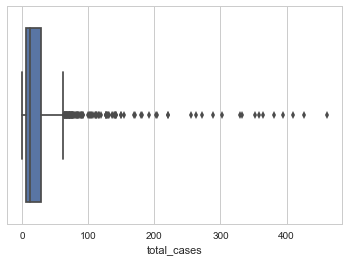

In [7]:
### Verifying Summary of the total cases
print(data.total_cases.describe())
sb.set(style="whitegrid")
ax = sb.boxplot(x=data["total_cases"])

- We can see that total cases of Dengue per Week have mean value of 24.6, max value as 461 and min value as 0 , From this data we can see that this distribution is highly skewed

### Function to display Yearly Pattern of total cases for the given city and Year


In [ ]:
def func(city, year, ylim = (0,400)):
    data = dengue_labels_train[dengue_labels_train['city'] == city][dengue_labels_train['year'] == year]
    data.plot.bar('weekofyear', 'total_cases', legend=False, ylim = ylim,figsize=(75,25),title="Yearly Pattern for each week of the year",
                  fontsize=50)

In [ ]:
func('sj', 1998)


In [ ]:
func('iq', 2008)

### Dividing the data according to cities, splitting train and test data and verifying the total cases summary as per cities

In [8]:
sj_X_train=data[data.city=="sj"]
iq_X_train=data[data.city=="iq"]
test_size = 0.25
seed = 7
sj_X_train, sj_X_test = train_test_split(sj_X_train, test_size=test_size, random_state=seed)
iq_X_train, iq_X_test = train_test_split(iq_X_train, test_size=test_size, random_state=seed)

###  Let's see the total cases effected for sanjuan city

count    702.000000
mean      35.249288
std       52.894417
min        0.000000
25%        9.000000
50%       20.000000
75%       38.000000
max      426.000000
Name: total_cases, dtype: float64


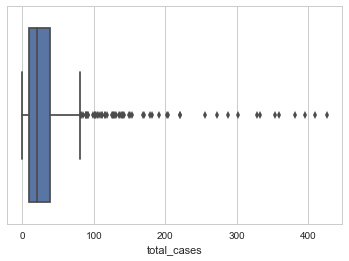

In [9]:
print(sj_X_train.total_cases.describe())
sb.set(style="whitegrid")
ax = sb.boxplot(x=sj_X_train["total_cases"])

#### We can see that there are so many outliers and mean of the data is 35.24 for train data and median of the data is having 20 cases of sanjuan city 

count    390.000000
mean       8.087179
std       11.745265
min        0.000000
25%        1.000000
50%        5.000000
75%        9.000000
max      116.000000
Name: total_cases, dtype: float64


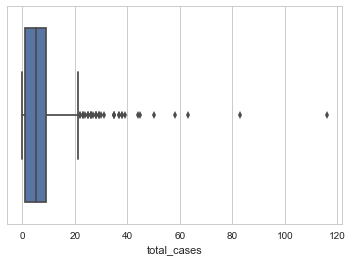

In [10]:
print(iq_X_train.total_cases.describe())
sb.set(style="whitegrid")
ax = sb.boxplot(x=iq_X_train["total_cases"])

### For iquitos, we can see that total cases are very low when compared to sanjuan city and mean is 8 cases median of the cases is 5.

### Here target i.e y is total cases so, we divide the data as (X,y) for both cities and for both train and test data.

In [11]:
sj_Y_train = sj_X_train.total_cases
sj_Y_test = sj_X_test.total_cases

iq_Y_train = iq_X_train.total_cases
iq_Y_test = iq_X_test.total_cases



In [12]:
sj_X_train = sj_X_train[sj_X_train.columns[1:8]]
iq_X_train = iq_X_train[iq_X_train.columns[1:8]]

sj_X_test=  sj_X_test[sj_X_test.columns[1:8]]
iq_X_test = iq_X_test[iq_X_test.columns[1:8]]


### Standardizing the data

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sj_X_train[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]=scaler.fit_transform(sj_X_train[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']])
iq_X_train[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]=scaler.fit_transform(iq_X_train[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']])
sj_X_test[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]=scaler.fit_transform(sj_X_test[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']])
iq_X_test[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']]=scaler.fit_transform(iq_X_test[['reanalysis_precip_amt_kg_per_m2','reanalysis_avg_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']])

## Negative Binomial Regression

### Modelling for sanjuan city

In [14]:
formula1 = ' + '.join([str(i) for i in list(sj_X_train.columns)])
formula1 = 'y ~ ' + formula1

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

train_sj = sj_X_train.copy()
train_sj['y'] = sj_Y_train
test_sj = sj_X_test.copy()

model1 = smf.glm(formula=formula1,
                data=train_sj,
                family=sm.families.NegativeBinomial(alpha=0.01))
model1 = model1.fit()
model1.summary()
predictions_sj = model1.predict(test_sj).astype(int)
print ("test error:", mean_absolute_error(predictions_sj, sj_Y_test))

pred_train_sj = model1.predict(train_sj).astype(int)
print ("train error:", mean_absolute_error(pred_train_sj, sj_Y_train))

test error: 14.478632478632479
train error: 15.354700854700855


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Modelling for iquitos city

In [15]:
formula2 = ' + '.join([str(i) for i in list(iq_X_train.columns)])
formula2 = 'y ~ ' + formula2

train_iq = iq_X_train.copy()
train_iq['y'] = iq_Y_train
test_iq = iq_X_test.copy()

model2 = smf.glm(formula=formula2,
                data=train_iq,
                family=sm.families.NegativeBinomial(alpha=1.5))
model2 = model2.fit()
model2.summary()

predictions_iq = model2.predict(test_iq).astype(int)
print ("test error:", mean_absolute_error(predictions_iq, iq_Y_test))

pred_train_iq = model2.predict(train_iq).astype(int)
print ("train error:", mean_absolute_error(pred_train_iq, iq_Y_train))

test error: 4.892307692307693
train error: 4.574358974358974


### Combined Modelling for both cities

In [16]:
pred = predictions_iq.append(predictions_sj)
true = iq_Y_test.append(sj_Y_test)
print ("test error:", mean_absolute_error(pred, true))

train_pred = pred_train_iq.append(pred_train_sj)
train_true = iq_Y_train.append(sj_Y_train)
print ("train error:", mean_absolute_error(train_pred, train_true))

test error: 11.054945054945055
train error: 11.504578754578755


In [17]:
train_pred[70:80], train_true[70:80]

(1182     5
 1035     9
 1262    10
 1084     1
 951      0
 1099     1
 1232     8
 982      0
 1022    20
 973      0
 dtype: int64, 1182     9
 1035    13
 1262     2
 1084     1
 951      1
 1099     0
 1232     8
 982      1
 1022     7
 973      0
 Name: total_cases, dtype: int64)

In [18]:
np.mean(train_pred)


24.73992673992674

In [19]:
np.mean(train_true)

25.5485347985348

In [20]:
np.mean(abs(train_true - np.mean(train_true)))

23.985557635282877

In [26]:
# example of making predictions for a regression problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from numpy import array


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#X, Y = make_regression(n_samples=len(X), n_features=7, noise=0.1, random_state=1)

In [28]:
#train.dropna(inplace = True)
## training
# X.shape
# train1 = train.values
X = sj_X_train.copy()
Y = sj_Y_train.copy()

scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(Y.reshape(len(X),1))
X = scalarX.transform(X)
Y = scalarY.transform(Y.reshape(len(X),1))

model = Sequential()
model.add(Dense(50, input_dim=7, kernel_initializer= 'normal',kernel_regularizer= 'l2', activation='elu'))
model.add(Dense(40,  activation='elu', kernel_regularizer= 'l2'))
model.add(Dense(1))

sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='poisson', optimizer=sgd, metrics=['mae'])
hist = model.fit(X, Y, epochs=40, batch_size=20,  verbose=1, validation_split=0.3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


Train on 491 samples, validate on 211 samples
Epoch 1/40
491/491 [==============================] - 0s 596us/step - loss: nan - mean_absolute_error: 0.3014 - val_loss: nan - val_mean_absolute_error: 0.4171
Epoch 2/40
491/491 [==============================] - 0s 114us/step - loss: nan - mean_absolute_error: 0.5289 - val_loss: nan - val_mean_absolute_error: 0.6523
Epoch 3/40
491/491 [==============================] - 0s 113us/step - loss: nan - mean_absolute_error: 0.7599 - val_loss: nan - val_mean_absolute_error: 0.8812
Epoch 4/40
491/491 [==============================] - 0s 82us/step - loss: nan - mean_absolute_error: 0.9870 - val_loss: nan - val_mean_absolute_error: 1.1123
Epoch 5/40
491/491 [==============================] - 0s 108us/step - loss: nan - mean_absolute_error: 1.2223 - val_loss: nan - val_mean_absolute_error: 1.3538
Epoch 6/40
491/491 [==============================] - 0s 99us/step - loss: nan - mean_absolute_error: 1.4686 - val_loss: nan - val_mean_absolute_error: 1.6

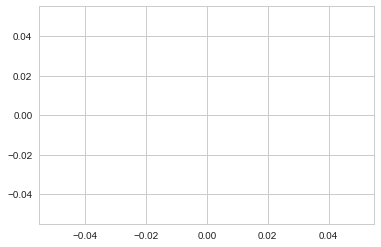

In [29]:
loss_values = hist.history['loss']
val_loss =  hist.history['val_loss']
import matplotlib.pyplot as plt
plt.plot(loss_values)
plt.plot(val_loss)
plt.show()

In [ ]:
# make a prediction
X_test = sj_X_test
y_test = model.predict(sj_X_test)
# show the inputs and predicted outputs


In [ ]:
sj_X_test=sj_X_test.reset_index()
sj_Y_test=sj_Y_test.reset_index()
for i in range(len(X_test)):
    print("Predicted=%s,true=%s" % (sj_Y_test[i],y_test[i].astype(int)))